# Importing dependencies

In [221]:
# !pip install snowflake

In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime
import snowflake.connector

from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# import shap
import xgboost as xgb

# Getting the data from Snowflake

In [223]:

# Set up connection parameters
account = 'ix15907.central-india.azure'
user = 'shreeom'
password = 'Qwerty@18606'
warehouse = 'COMPUTE_WH'
database = 'JMAN_FINAL_PROJECT'
schema = 'DBO_MART'
table = 'REGISTERED_FINAL'

# Establish connection
conn = snowflake.connector.connect(
    user=user,
    password=password,
    account=account,
    warehouse=warehouse,
    database=database,
    schema=schema
)

# Create a cursor object
cur = conn.cursor()

# Execute a query to select data from the table
cur.execute(f'SELECT * FROM JMAN_FINAL_PROJECT.DBO_MART.REGISTERED_FINAL')

# Fetch the results
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Convert the result into a pandas DataFrame for easier manipulation
df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])

In [224]:
df.head(5)

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,C7
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0


# Getting the data from csv where data is saved

In [392]:

users = pd.read_csv('../Jman-final-project-datasets-sg/users-sg.csv')
user_skills = pd.read_csv('../Jman-final-project-datasets-sg/user_skill-sg.csv')
skills = pd.read_csv('../Jman-final-project-datasets-sg/skill.csv')
registrations = pd.read_csv('../Jman-final-project-datasets-sg/Registrations-sg.csv')
interests = pd.read_csv('../Jman-final-project-datasets-sg/interest-sg.csv')
events = pd.read_csv('../Jman-final-project-datasets-sg/event-sg.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../Jman-final-project-datasets-sg/users-sg.csv'

In [226]:
dataset = pd.read_csv('./elearning_platform.csv')
dataset

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,True,True,False,False,True,True,False,True,True,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,True,False,False,False,True,False,True,True,True,False
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,False,False,False,False,True,True,True,True,False,False
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,False,False,False,False,True,True,True,True,False,False
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,True,True,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,False,True,True,True,False,False,False,True,False,False
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,...,False,True,True,False,False,True,False,True,True,False
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,...,True,True,True,True,False,False,False,False,True,True
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,False,True,False,False,True,False,True,True,True,True


In [227]:
df = dataset.copy()
df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,True,True,False,False,True,True,False,True,True,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,True,False,False,False,True,False,True,True,True,False
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,False,False,False,False,True,True,True,True,False,False
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,False,False,False,False,True,True,True,True,False,False
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,True,True,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,False,True,True,True,False,False,False,True,False,False
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,...,False,True,True,False,False,True,False,True,True,False
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,...,True,True,True,True,False,False,False,False,True,True
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,False,True,False,False,True,False,True,True,True,True


In [228]:
df.shape

(1000, 31)

In [229]:
df.describe()

,USERR_ID,EVENT_ID,CAPACITY,REGISTERED,ID,EXPERIENCE
count,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000
mean,49.438000,15.454000,46.42000,0.0,49.438000,4.929000
std,28.584213,8.637157,4.79652,0.0,28.584213,3.239823
min,1.000000,1.000000,40.00000,0.0,1.000000,0.000000
25%,24.750000,8.000000,40.00000,0.0,24.750000,2.000000
50%,49.000000,15.000000,50.00000,0.0,49.000000,5.000000
75%,74.000000,23.000000,50.00000,0.0,74.000000,7.000000
max,100.000000,30.000000,50.00000,0.0,100.000000,10.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   USERR_ID          1000 non-null   int64 
 1   EVENT_ID          1000 non-null   int64 
 2   NAME              1000 non-null   object
 3   DOMAIN            1000 non-null   object
 4   DATE              1000 non-null   object
 5   STARTTIME         1000 non-null   object
 6   ENDTIME           1000 non-null   object
 7   LOCATION          1000 non-null   object
 8   TRAINER           1000 non-null   object
 9   CAPACITY          1000 non-null   int64 
 10  REGISTERED        1000 non-null   int64 
 11  RESOURCE_LINK     1000 non-null   object
 12  DESCRIPTION       1000 non-null   object
 13  ID                1000 non-null   int64 
 14  FIRST_NAME        1000 non-null   object
 15  LAST_NAME         1000 non-null   object
 16  EMAIL             1000 non-null   object
 17  GENDER         

In [231]:
null_count = df.isnull().sum()
null_count

USERR_ID            0
EVENT_ID            0
NAME                0
DOMAIN              0
DATE                0
STARTTIME           0
ENDTIME             0
LOCATION            0
TRAINER             0
CAPACITY            0
REGISTERED          0
RESOURCE_LINK       0
DESCRIPTION         0
ID                  0
FIRST_NAME          0
LAST_NAME           0
EMAIL               0
GENDER              0
DESIGNATION         0
EXPERIENCE          0
React               0
Javascript          0
Node                0
Python              0
Machine_Learning    0
NoSQL               0
ETL                 0
Data_Warehouse      0
Big_Data            0
HTML                0
SQL                 0
dtype: int64

In [232]:
percentage_null = (null_count / len(df)) * 100
percentage_null

USERR_ID            0.0
EVENT_ID            0.0
NAME                0.0
DOMAIN              0.0
DATE                0.0
STARTTIME           0.0
ENDTIME             0.0
LOCATION            0.0
TRAINER             0.0
CAPACITY            0.0
REGISTERED          0.0
RESOURCE_LINK       0.0
DESCRIPTION         0.0
ID                  0.0
FIRST_NAME          0.0
LAST_NAME           0.0
EMAIL               0.0
GENDER              0.0
DESIGNATION         0.0
EXPERIENCE          0.0
React               0.0
Javascript          0.0
Node                0.0
Python              0.0
Machine_Learning    0.0
NoSQL               0.0
ETL                 0.0
Data_Warehouse      0.0
Big_Data            0.0
HTML                0.0
SQL                 0.0
dtype: float64

In [233]:
df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,True,True,False,False,True,True,False,True,True,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,True,False,False,False,True,False,True,True,True,False
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,False,False,False,False,True,True,True,True,False,False
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,False,False,False,False,True,True,True,True,False,False
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,True,True,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,False,True,True,True,False,False,False,True,False,False
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,...,False,True,True,False,False,True,False,True,True,False
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,...,True,True,True,True,False,False,False,False,True,True
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,False,True,False,False,True,False,True,True,True,True


In [234]:
df.head(5)

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,True,True,False,False,True,True,False,True,True,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,True,False,False,False,True,False,True,True,True,False
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,False,False,False,False,True,True,True,True,False,False
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,False,False,False,False,True,True,True,True,False,False
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,True,True,False,False,True,True,True,True,True


In [235]:
df.columns

Index(['USERR_ID', 'EVENT_ID', 'NAME', 'DOMAIN', 'DATE', 'STARTTIME',
       'ENDTIME', 'LOCATION', 'TRAINER', 'CAPACITY', 'REGISTERED',
       'RESOURCE_LINK', 'DESCRIPTION', 'ID', 'FIRST_NAME', 'LAST_NAME',
       'EMAIL', 'GENDER', 'DESIGNATION', 'EXPERIENCE', 'React', 'Javascript',
       'Node', 'Python', 'Machine_Learning', 'NoSQL', 'ETL', 'Data_Warehouse',
       'Big_Data', 'HTML', 'SQL'],
      dtype='object')

# UNIVARIATE ANALYSIS

Setting the color theme for my plots

In [236]:
custom_palette = ['#8A2BE2', '#9932CC', '#9400D3', '#8B008B', '#800080', '#9370DB', '#BA55D3', '#DA70D6', '#D8BFD8']
sns.set_palette(custom_palette)

In [237]:
# designation should be same for single user
first_designation_per_user = df.groupby('USERR_ID')['DESIGNATION'].first()


Distribution of Users by Gender

GENDER
Female    45
Male      55
Name: USERR_ID, dtype: int64


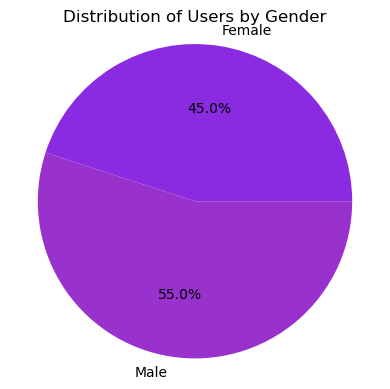

In [238]:

# Count the number of unique users for each gender
unique_users_by_gender = df.groupby('GENDER')['USERR_ID'].nunique()
print(unique_users_by_gender)
plt.figure(figsize=(4, 4))
plt.pie(unique_users_by_gender, labels=unique_users_by_gender.index, autopct='%1.1f%%', colors =custom_palette)
plt.title('Distribution of Users by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show plot
plt.tight_layout()
plt.show()

Skills Distribution among the users

In [239]:


# # List of skill column names
# skill_columns = ['React', 'Javascript', 'Node', 'Python', 'Machine_Learning', 
#                  'NoSQL', 'ETL', 'Data_Warehouse', 'Big_Data', 'HTML', 'SQL']

# # Group by user ID and count the number of users who have each skill
# users_with_skill = df.groupby('USERR_ID')[skill_columns].max().sum()

# # Count the number of unique users
# num_unique_users = df['USERR_ID'].nunique()

# # Count the number of users who don't have each skill
# users_without_skill = pd.Series(num_unique_users, index=skill_columns) - users_with_skill

# # Create a bar plot
# plt.figure(figsize=(12, 6))
# plt.bar(range(len(skill_columns)), users_with_skill, color=custom_palette[0], label='With Skill')
# plt.bar(range(len(skill_columns)), users_without_skill, bottom=users_with_skill, color=custom_palette[6], label='Without Skill')
# plt.title('Number of Unique Users with and without Each Skill')
# plt.xlabel('Skills')
# plt.ylabel('Number of Unique Users')
# plt.xticks(range(len(skill_columns)), skill_columns, rotation=45)
# plt.legend()
# plt.grid(axis='y')

# # Show plot
# plt.tight_layout()
# plt.show()


Experience Distribution among the user

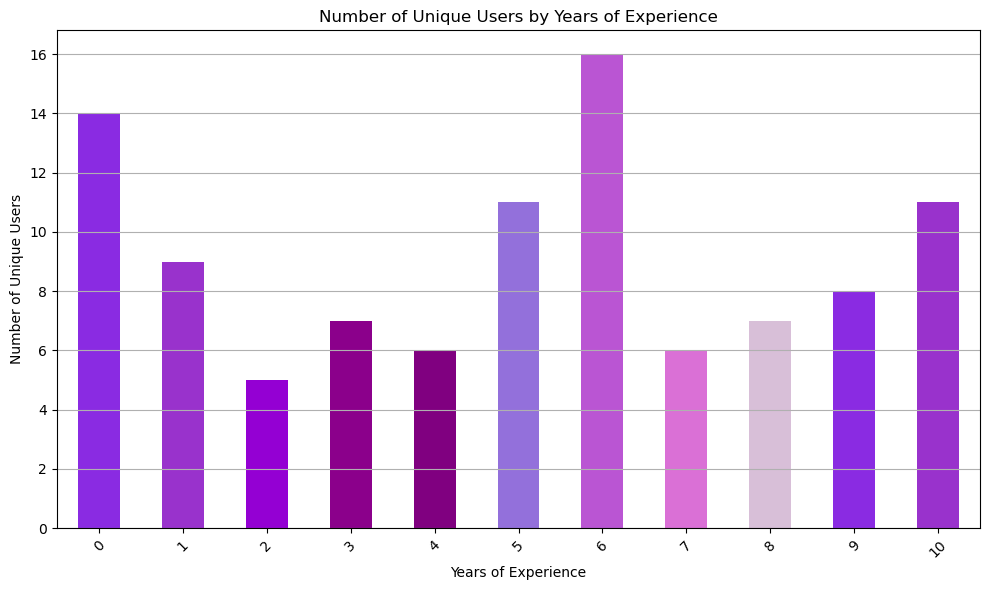

In [240]:
# Group by user ID and get the maximum experience for each user
max_experience_per_user = df.groupby('USERR_ID')['EXPERIENCE'].max()

# Count the number of unique users with each years of experience
users_by_experience = max_experience_per_user.value_counts().sort_index()

# Plot the distribution of years of experience
plt.figure(figsize=(10, 6))
users_by_experience.plot(kind='bar',color=custom_palette)
plt.title('Number of Unique Users by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

Designation Distribution

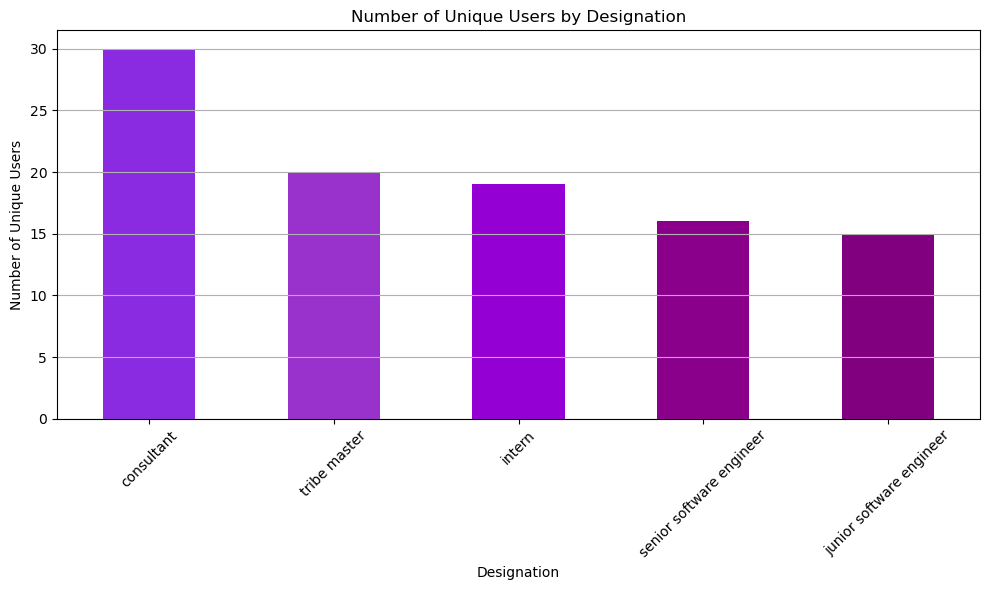

In [241]:
# Group by user ID and get the first designation for each user
first_designation_per_user = df.groupby('USERR_ID')['DESIGNATION'].first()

# Count the number of unique users with each designation
users_by_designation = first_designation_per_user.value_counts()
print()
# Plot the distribution of designations
plt.figure(figsize=(10, 6))
users_by_designation.plot(kind='bar', color=custom_palette)
plt.title('Number of Unique Users by Designation')
plt.xlabel('Designation')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

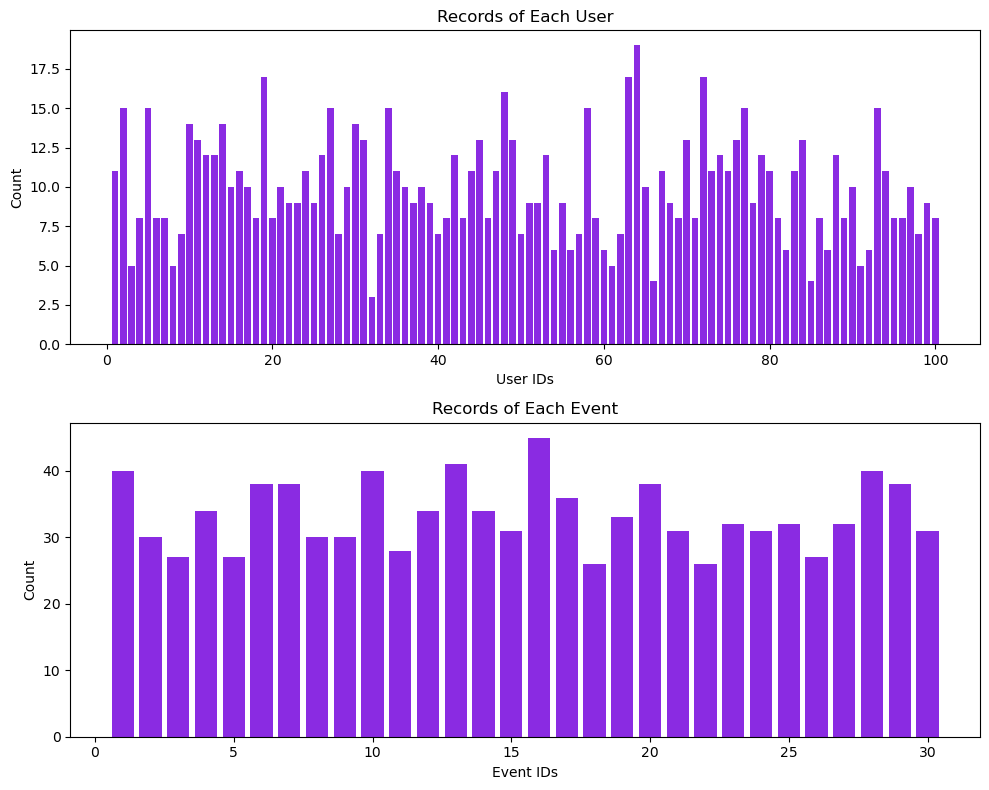

In [242]:
user_id_counts = df['USERR_ID'].value_counts()

# Count the occurrences of each event ID
event_id_counts = df['EVENT_ID'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the count of user IDs
axes[0].bar(user_id_counts.index, user_id_counts.values)
axes[0].set_title('Records of Each User')
axes[0].set_xlabel('User IDs')
axes[0].set_ylabel('Count')

# Plot the count of event IDs
axes[1].bar(event_id_counts.index, event_id_counts.values)
axes[1].set_title('Records of Each Event')
axes[1].set_xlabel('Event IDs')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

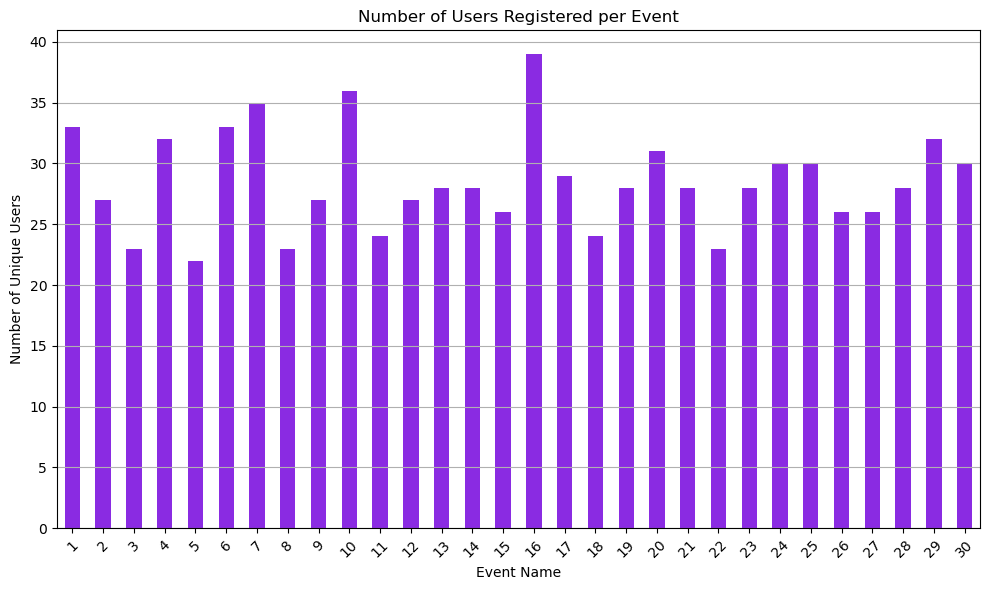

In [243]:
#  Group the data by event ID and count the number of unique user IDs
unique_users_per_event = df.groupby('EVENT_ID')['USERR_ID'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
unique_users_per_event.plot(kind='bar')
plt.title('Number of Users Registered per Event')
plt.xlabel('Event Name')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better visualization

# Show plot
plt.tight_layout()
plt.show()

Attendance per Event

In [244]:
# Group the data by event ID and count the number of unique user IDs
unique_users_per_event = df.groupby('EVENT_ID')['USERR_ID'].nunique()

# Reset the index to make 'EVENT_ID' a column again
unique_users_per_event = unique_users_per_event.reset_index()

# Rename the columns for clarity
unique_users_per_event.columns = ['EVENT_ID', 'Num_Registered_Users']

# Merge the unique_users_per_event DataFrame with the original DataFrame to get the capacity
merged_df = pd.merge(df, unique_users_per_event, on='EVENT_ID', how='left')

# Calculate attendance percentage
merged_df['Attendance_Percentage'] = (merged_df['Num_Registered_Users'] / merged_df['CAPACITY']) * 100

# Print the result
print(merged_df[['EVENT_ID', 'Attendance_Percentage']])

     EVENT_ID  Attendance_Percentage
0          15                   52.0
1          21                   70.0
2          27                   65.0
3          16                   78.0
4           4                   64.0
..        ...                    ...
995        13                   56.0
996         6                   66.0
997        12                   54.0
998        13                   56.0
999        25                   75.0

[1000 rows x 2 columns]


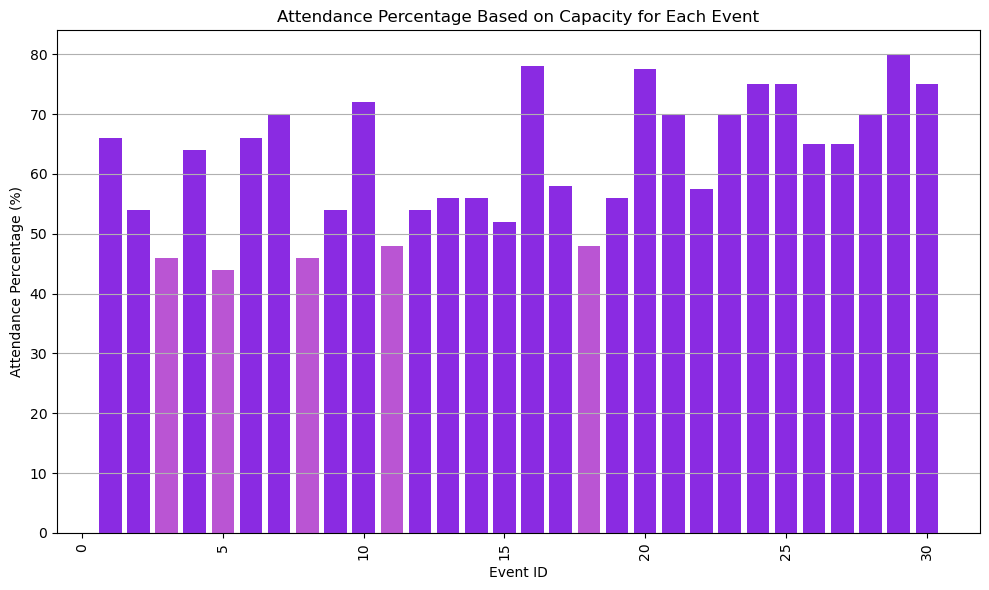

In [245]:
import matplotlib.pyplot as plt

# Set the color based on attendance percentage
colors = ['#BA55D3' if p < 50 else '#8A2BE2' for p in merged_df['Attendance_Percentage']]

plt.figure(figsize=(10, 6))
plt.bar(merged_df['EVENT_ID'], merged_df['Attendance_Percentage'], color=colors)
plt.title('Attendance Percentage Based on Capacity for Each Event')
plt.xlabel('Event ID')
plt.ylabel('Attendance Percentage (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better visualization

# Show plot
plt.tight_layout()
plt.show()


Registrations distribution over month

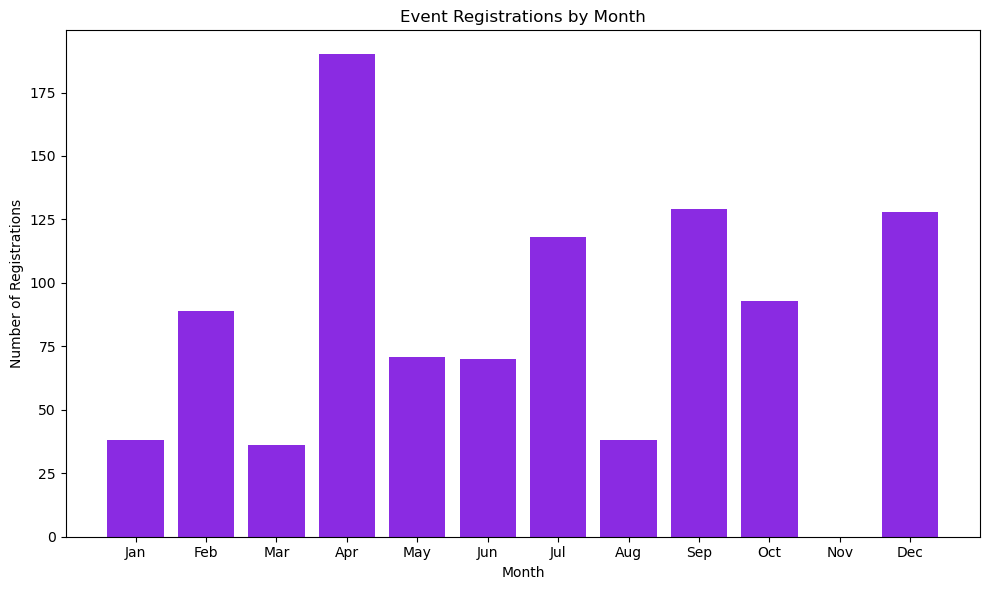

In [246]:

# Assuming you have a DataFrame 'df' with a 'Date' column in the format '24-05-2024'
# Convert the 'Date' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')

# Extract the month from the 'Date' column
df['Month'] = df['DATE'].dt.month

# Group registrations by month and count
monthly_registrations = df.groupby('Month')['USERR_ID'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_registrations.index, monthly_registrations.values)
plt.xlabel('Month')
plt.ylabel('Number of Registrations')
plt.title('Event Registrations by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.show()


In [247]:
df.columns

Index(['USERR_ID', 'EVENT_ID', 'NAME', 'DOMAIN', 'DATE', 'STARTTIME',
       'ENDTIME', 'LOCATION', 'TRAINER', 'CAPACITY', 'REGISTERED',
       'RESOURCE_LINK', 'DESCRIPTION', 'ID', 'FIRST_NAME', 'LAST_NAME',
       'EMAIL', 'GENDER', 'DESIGNATION', 'EXPERIENCE', 'React', 'Javascript',
       'Node', 'Python', 'Machine_Learning', 'NoSQL', 'ETL', 'Data_Warehouse',
       'Big_Data', 'HTML', 'SQL', 'Month'],
      dtype='object')

In [248]:
# # List of skill column names
# skill_columns = ['React', 'Javascript', 'Node', 'Python', 'Machine_Learning', 
#                  'NoSQL', 'ETL', 'Data_Warehouse', 'Big_Data', 'HTML', 'SQL']

# # Create an empty dictionary to store the counts of unique users for each skill
# skill_counts = {}

# # Iterate over each skill column
# for skill in skill_columns:
#     # Count the number of unique users for each skill
#     unique_users_with_skill = df[df[skill] == 1]['USERR_ID'].nunique()
#     # Store the count in the dictionary
#     skill_counts[skill] = unique_users_with_skill

# # Convert the dictionary to a DataFrame for easier plotting
# skill_counts_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['Num_Users'])

# # Sort the DataFrame by the number of users in descending order
# skill_counts_df = skill_counts_df.sort_values(by='Num_Users', ascending=False)

# # Create a bar plot
# plt.figure(figsize=(15, 20))
# skill_counts_df.plot(kind='bar',  legend=None)
# plt.title('Number of Users by Skill')
# plt.xlabel('Skill')
# plt.ylabel('Number of Unique Users')
# plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
# plt.grid(axis='y')  # Add gridlines for better visualization

# # Show plot
# plt.tight_layout()
# plt.show()

Number of Events per Domain

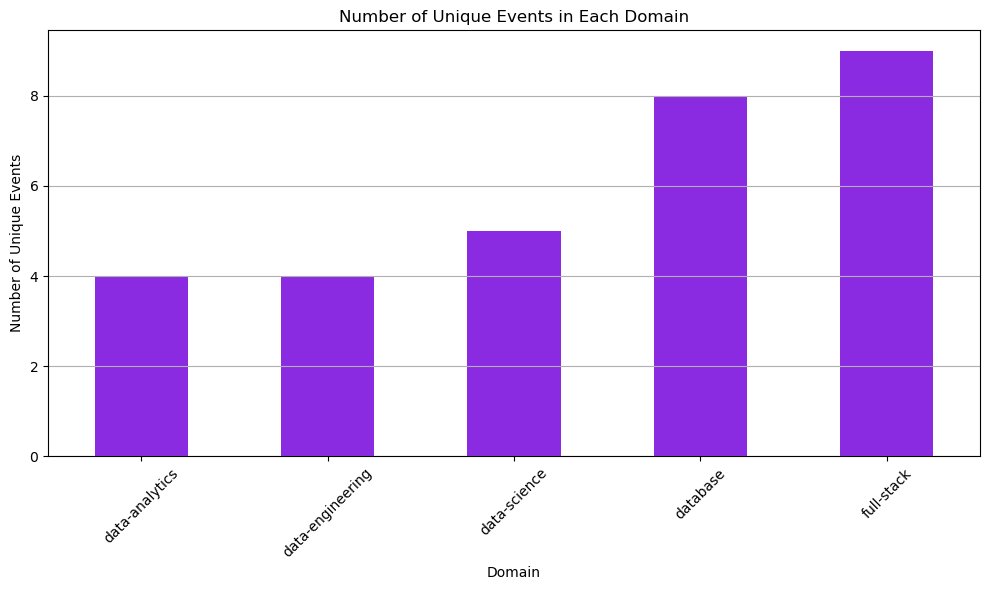

In [249]:

# Group the data by domain and count the number of unique events
unique_events_per_domain = df.groupby('DOMAIN')['EVENT_ID'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
unique_events_per_domain.plot(kind='bar')
plt.title('Number of Unique Events in Each Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Unique Events')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better visualization

# Show plot

plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS

Skills Distribution over Users

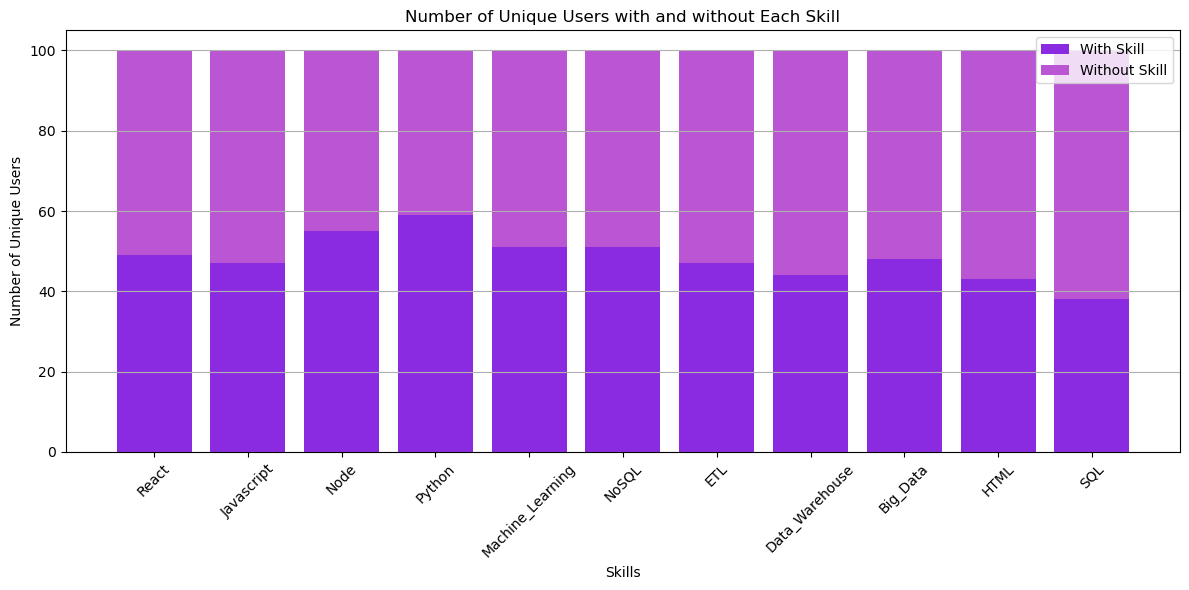

In [250]:


# List of skill column names
skill_columns = ['React', 'Javascript', 'Node', 'Python', 'Machine_Learning', 
                 'NoSQL', 'ETL', 'Data_Warehouse', 'Big_Data', 'HTML', 'SQL']

# Group by user ID and count the number of users who have each skill
users_with_skill = df.groupby('USERR_ID')[skill_columns].max().sum()

# Count the number of unique users
num_unique_users = df['USERR_ID'].nunique()

# Count the number of users who don't have each skill
users_without_skill = pd.Series(num_unique_users, index=skill_columns) - users_with_skill

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(skill_columns)), users_with_skill, color=custom_palette[0], label='With Skill')
plt.bar(range(len(skill_columns)), users_without_skill, bottom=users_with_skill, color=custom_palette[6], label='Without Skill')
plt.title('Number of Unique Users with and without Each Skill')
plt.xlabel('Skills')
plt.ylabel('Number of Unique Users')
plt.xticks(range(len(skill_columns)), skill_columns, rotation=45)
plt.legend()
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

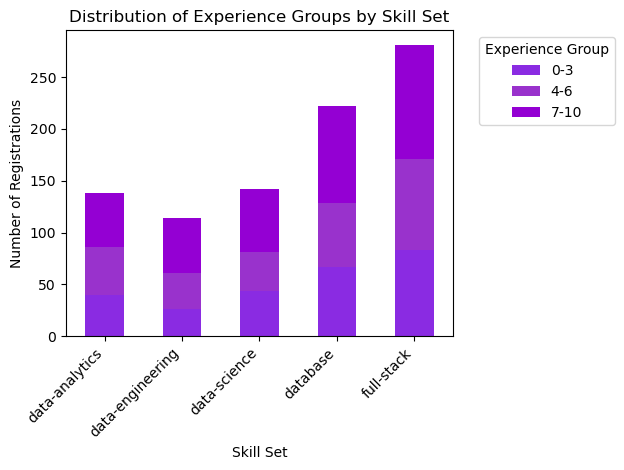

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with relevant columns
# Define the age groups
age_bins = [0, 3, 6, 10]
age_labels = ['0-3', '4-6', '7-10']

# Categorize 'EXPERIENCE' into age groups
df['EXPERIENCE_GROUP'] = pd.cut(df['EXPERIENCE'], bins=age_bins, labels=age_labels, right=False)

# Grouping the DataFrame by 'DOMAIN' and 'EXPERIENCE_GROUP' and counting the occurrences
skillset_experience_groups = df.groupby(['DOMAIN', 'EXPERIENCE_GROUP']).size().unstack(fill_value=0)

# Creating the bar plot
plt.figure(figsize=(12, 6))
skillset_experience_groups.plot(kind='bar', stacked=True)
plt.title('Distribution of Experience Groups by Skill Set')
plt.xlabel('Skill Set')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Experience Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Index(['React_registered', 'Javascript_registered', 'Node_registered',
       'Python_registered', 'Machine_Learning_registered', 'NoSQL_registered',
       'ETL_registered', 'Data_Warehouse_registered', 'Big_Data_registered',
       'HTML_registered', 'SQL_registered'],
      dtype='object')


<Axes: xlabel='DOMAIN'>

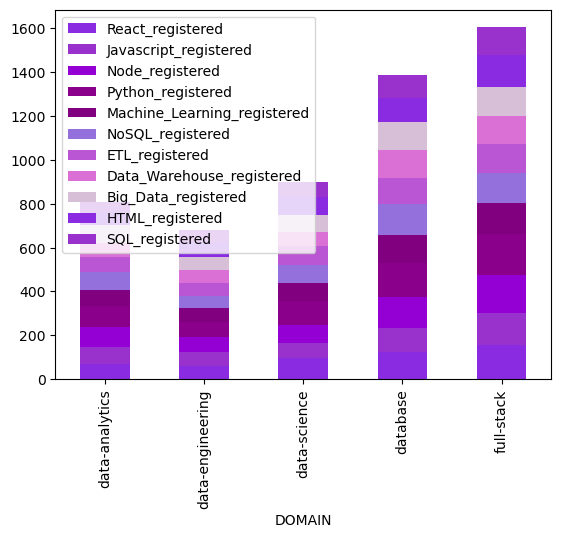

In [252]:
# Select relevant columns
skills_columns = ['React', 'Javascript', 'Node', 'Python', 'Machine_Learning', 'NoSQL', 'ETL', 'Data_Warehouse', 'Big_Data', 'HTML', 'SQL']
domain_column = 'DOMAIN'

# Create separate columns for each skill
for skill in skills_columns:
    df[f'{skill}_registered'] = df[skill]

# Group registrations by domain for each skill
registrations_by_domain = df.groupby(domain_column)[[f'{skill}_registered' for skill in skills_columns]].sum()

# Print the result (you can also visualize it
registrations_by_domain
print(registrations_by_domain.columns)
registrations_by_domain.plot(kind='bar', stacked=True)

# FEATURE ENGINEERING

Feature Creation

Duration of an event

In [253]:
df['STARTTIME'] = pd.to_datetime(df['STARTTIME'], format='%H:%M:%S')
df['ENDTIME'] = pd.to_datetime(df['ENDTIME'], format='%H:%M:%S')
df['DURATION'] = (df['STARTTIME'] - df['ENDTIME']).dt.total_seconds() / 3600
df['DURATION'] = df['DURATION'].abs()
df['DURATION'] = df['DURATION'].round()
df.head(5)

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Node_registered,Python_registered,Machine_Learning_registered,NoSQL_registered,ETL_registered,Data_Warehouse_registered,Big_Data_registered,HTML_registered,SQL_registered,DURATION
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,2023-10-17,1900-01-01 17:35:00,1900-01-01 07:17:00,aurum,Dermot Matteoni,50,...,True,False,False,True,True,False,True,True,True,10.0
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,2023-07-23,1900-01-01 18:33:00,1900-01-01 02:24:00,falcon,Benjamen Pass,40,...,False,False,False,True,False,True,True,True,False,16.0
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,2023-09-29,1900-01-01 21:09:00,1900-01-01 02:19:00,tardis,Anica Skeemor,40,...,False,False,False,True,True,True,True,False,False,19.0
3,68,16,Data Analytics for Business Professionals,data-analytics,2024-05-24,1900-01-01 14:48:00,1900-01-01 01:59:00,jarvis,Cordey Panton,50,...,False,False,False,True,True,True,True,False,False,13.0
4,88,4,Full Stack Development Bootcamp,full-stack,2023-07-04,1900-01-01 19:09:00,1900-01-01 03:37:00,aurum,Selma Eathorne,50,...,True,True,False,False,True,True,True,True,True,16.0


Month in which event is being hold

In [254]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
df['MONTH'] = df['DATE'].dt.month
df.head(5)


,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Python_registered,Machine_Learning_registered,NoSQL_registered,ETL_registered,Data_Warehouse_registered,Big_Data_registered,HTML_registered,SQL_registered,DURATION,MONTH
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,2023-10-17,1900-01-01 17:35:00,1900-01-01 07:17:00,aurum,Dermot Matteoni,50,...,False,False,True,True,False,True,True,True,10.0,10
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,2023-07-23,1900-01-01 18:33:00,1900-01-01 02:24:00,falcon,Benjamen Pass,40,...,False,False,True,False,True,True,True,False,16.0,7
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,2023-09-29,1900-01-01 21:09:00,1900-01-01 02:19:00,tardis,Anica Skeemor,40,...,False,False,True,True,True,True,False,False,19.0,9
3,68,16,Data Analytics for Business Professionals,data-analytics,2024-05-24,1900-01-01 14:48:00,1900-01-01 01:59:00,jarvis,Cordey Panton,50,...,False,False,True,True,True,True,False,False,13.0,5
4,88,4,Full Stack Development Bootcamp,full-stack,2023-07-04,1900-01-01 19:09:00,1900-01-01 03:37:00,aurum,Selma Eathorne,50,...,True,False,False,True,True,True,True,True,16.0,7


In [255]:

# Assuming you have a DataFrame 'df' with a 'STARTTIME' column
# Convert 'STARTTIME' to datetime format
df['STARTTIME'] = pd.to_datetime(df['STARTTIME'], format='%Y-%m-%d %H:%M:%S')

# Define time intervals
morning_start = datetime.strptime('06:00:00', '%H:%M:%S').time()
afternoon_start = datetime.strptime('12:00:00', '%H:%M:%S').time()
evening_start = datetime.strptime('18:00:00', '%H:%M:%S').time()
night_start = datetime.strptime('00:00:00', '%H:%M:%S').time()

# Categorize the STARTTIME
def categorize_time(time):
    if morning_start <= time < afternoon_start:
        return 'Morning'
    elif afternoon_start <= time < evening_start:
        return 'Afternoon'
    elif evening_start <= time or time < night_start:
        return 'Evening'
    elif night_start <= time or time < morning_start:
        return 'Night'

# Apply the categorization to the STARTTIME column
df['Time_Group'] = df['STARTTIME'].dt.time.apply(categorize_time)
df.head(5)


,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Machine_Learning_registered,NoSQL_registered,ETL_registered,Data_Warehouse_registered,Big_Data_registered,HTML_registered,SQL_registered,DURATION,MONTH,Time_Group
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,2023-10-17,1900-01-01 17:35:00,1900-01-01 07:17:00,aurum,Dermot Matteoni,50,...,False,True,True,False,True,True,True,10.0,10,Afternoon
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,2023-07-23,1900-01-01 18:33:00,1900-01-01 02:24:00,falcon,Benjamen Pass,40,...,False,True,False,True,True,True,False,16.0,7,Evening
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,2023-09-29,1900-01-01 21:09:00,1900-01-01 02:19:00,tardis,Anica Skeemor,40,...,False,True,True,True,True,False,False,19.0,9,Evening
3,68,16,Data Analytics for Business Professionals,data-analytics,2024-05-24,1900-01-01 14:48:00,1900-01-01 01:59:00,jarvis,Cordey Panton,50,...,False,True,True,True,True,False,False,13.0,5,Afternoon
4,88,4,Full Stack Development Bootcamp,full-stack,2023-07-04,1900-01-01 19:09:00,1900-01-01 03:37:00,aurum,Selma Eathorne,50,...,False,False,True,True,True,True,True,16.0,7,Evening


# Feature Selection

In [393]:
label_encoder = LabelEncoder()
df1=df.copy()


Label encodings

In [394]:
df1['EXPERIENCE_GROUP'] = label_encoder.fit_transform(df1['EXPERIENCE_GROUP'].astype(str))
df1['LOCATION'] = label_encoder.fit_transform(df1['LOCATION'].astype(str))
df1['GENDER'] = label_encoder.fit_transform(df1['GENDER'].astype(str))
df1['DESIGNATION'] = label_encoder.fit_transform(df1['DESIGNATION'].astype(str))
df1['Time_Group'] = label_encoder.fit_transform(df1['Time_Group'].astype(str))

Dropping unrelated columns

In [395]:
df1 = df1.drop(columns=['EVENT_ID','USERR_ID','REGISTERED','React_registered', 'Javascript_registered', 'Node_registered',
       'Python_registered', 'Machine_Learning_registered', 'NoSQL_registered',
       'ETL_registered', 'Data_Warehouse_registered', 'Big_Data_registered',
       'HTML_registered', 'SQL_registered','RESOURCE_LINK',
                      'DESCRIPTION','ID','FIRST_NAME','LAST_NAME', 'EMAIL','STARTTIME', 'ENDTIME','Month','TRAINER'])
df1.head(5)

,NAME,DOMAIN,LOCATION,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,Javascript,Node,...,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,EXPERIENCE_GROUP,DURATION,MONTH,Time_Group
0,Advanced Data Engineering Techniques Seminar,data-engineering,0,50,0,1,7,True,True,True,...,True,True,False,True,True,True,2,10.0,10,0
1,Full Stack Webinar Series: Frontend to Backend,full-stack,1,40,1,1,10,True,True,False,...,True,False,True,True,True,False,3,16.0,7,1
2,Data Science Summit: Cutting-Edge Research,data-science,5,40,1,0,1,False,False,False,...,True,True,True,True,False,False,0,19.0,9,1
3,Data Analytics for Business Professionals,data-analytics,3,50,1,0,1,False,False,False,...,True,True,True,True,False,False,0,13.0,5,0
4,Full Stack Development Bootcamp,full-stack,0,50,0,0,0,False,True,True,...,False,True,True,True,True,True,0,16.0,7,1


Checking the correlation between numeric columns

                  LOCATION  CAPACITY    GENDER  DESIGNATION  EXPERIENCE  \
LOCATION          1.000000 -0.147954 -0.043354     0.027164    0.046525   
CAPACITY         -0.147954  1.000000 -0.002185     0.003859   -0.018305   
GENDER           -0.043354 -0.002185  1.000000    -0.037699    0.088814   
DESIGNATION       0.027164  0.003859 -0.037699     1.000000   -0.037486   
EXPERIENCE        0.046525 -0.018305  0.088814    -0.037486    1.000000   
EXPERIENCE_GROUP  0.050158 -0.024138  0.088433     0.005357    0.957311   
DURATION          0.346540 -0.326127 -0.015328    -0.012660    0.030753   
MONTH            -0.001286 -0.205858 -0.049915     0.013451    0.042221   
Time_Group       -0.069768 -0.116800  0.025458     0.005086    0.028031   

                  EXPERIENCE_GROUP  DURATION     MONTH  Time_Group  
LOCATION                  0.050158  0.346540 -0.001286   -0.069768  
CAPACITY                 -0.024138 -0.326127 -0.205858   -0.116800  
GENDER                    0.088433 -0.0153

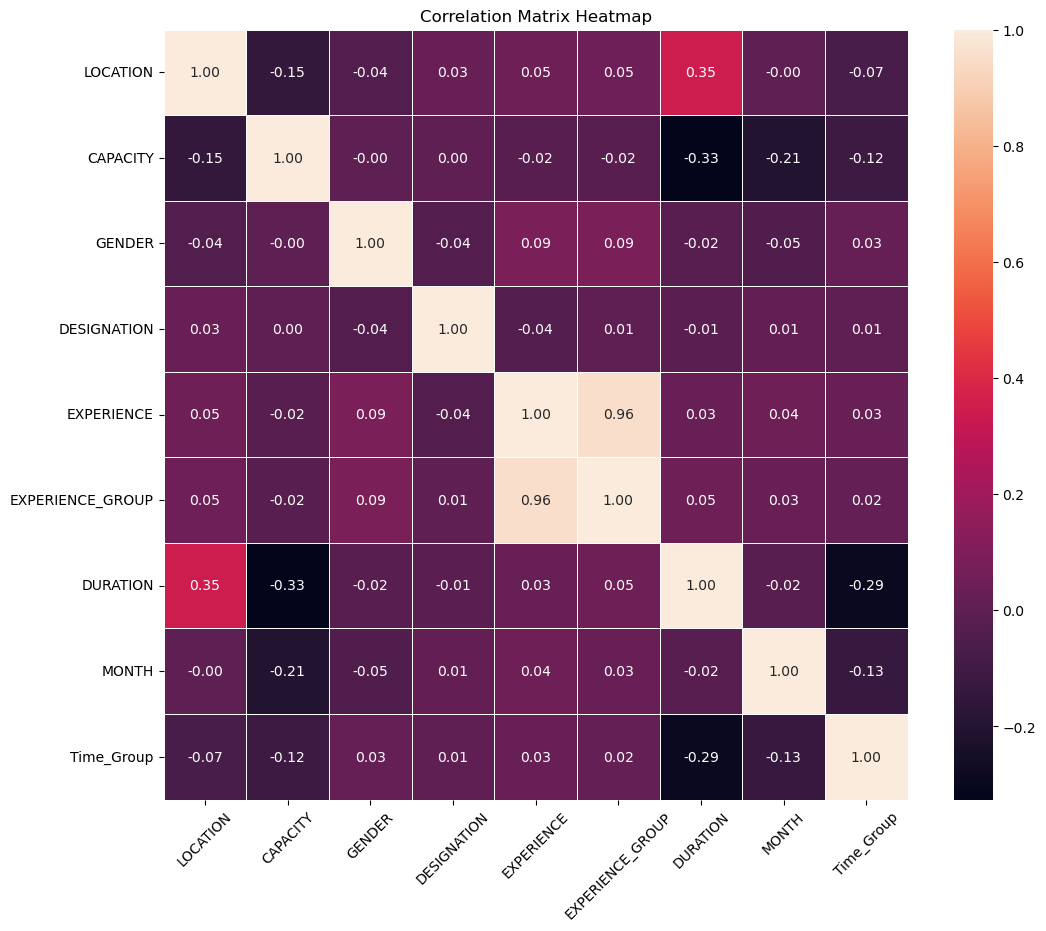

In [397]:
import seaborn as sns

# Drop non-numeric columns
numerics_df1 = df1.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerics_df1.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix,annot=True, color=custom_palette, fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()


Chi-square and anova relation matrix

In [402]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Assuming df is your DataFrame

# Function to calculate Chi-square statistic for boolean columns
def chi_square_for_bool(df):
    chi2_dict = {}
    for col in df.columns:
        if df[col].dtype == bool:
            observed = pd.crosstab(df[col], df['DOMAIN'])  # Assuming 'target_column' is your target variable
            chi2, p, dof, expected = chi2_contingency(observed)
            chi2_dict[col] = (chi2, p)
    return chi2_dict

# Function to calculate ANOVA relation matrix for numerical columns
def anova_relation_matrix(df):
    anova_dict = {}
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            groups = [df[df['DOMAIN'] == val][col].dropna() for val in df['DOMAIN'].unique()]
            anova_result = f_oneway(*groups)
            anova_dict[col] = anova_result
    return anova_dict

In [403]:
chi2_results = chi_square_for_bool(df1)
chi2_results


{'React': (5.443924918964798, 0.2447026724092209),
 'Javascript': (5.958439656078313, 0.20227359828454666),
 'Node': (2.3787651911948577, 0.6664680940950113),
 'Python': (5.193182475831867, 0.26804384278142884),
 'Machine_Learning': (0.5730181896713615, 0.9660142699438387),
 'NoSQL': (7.821449808161739, 0.0983420732387265),
 'ETL': (4.995004153648548, 0.2878104844757107),
 'Data_Warehouse': (5.223800921243742, 0.26509517052454495),
 'Big_Data': (3.905425628896971, 0.41895638039436545),
 'HTML': (9.682672146276998, 0.04612609104461374),
 'SQL': (8.47781729609256, 0.07556247777921009)}

In [404]:
anova_results = anova_relation_matrix(df1)
anova_results

{'LOCATION': F_onewayResult(statistic=13.389758631448913, pvalue=1.2411298523322214e-10),
 'CAPACITY': F_onewayResult(statistic=12.212634658947369, pvalue=1.0707960954283056e-09),
 'GENDER': F_onewayResult(statistic=0.5131861140624984, pvalue=0.7260683073755259),
 'DESIGNATION': F_onewayResult(statistic=1.2958115543434734, pvalue=0.2698096954433064),
 'EXPERIENCE': F_onewayResult(statistic=1.6688807740226292, pvalue=0.15498956447362008),
 'EXPERIENCE_GROUP': F_onewayResult(statistic=1.1848102864666485, pvalue=0.3158353706218111),
 'DURATION': F_onewayResult(statistic=11.683666597944041, pvalue=2.82180773522523e-09),
 'MONTH': F_onewayResult(statistic=108.00002629510439, pvalue=1.869679208908053e-76),
 'Time_Group': F_onewayResult(statistic=35.77121440011953, pvalue=5.9319484390708535e-28)}

Chi-square and Anova plots

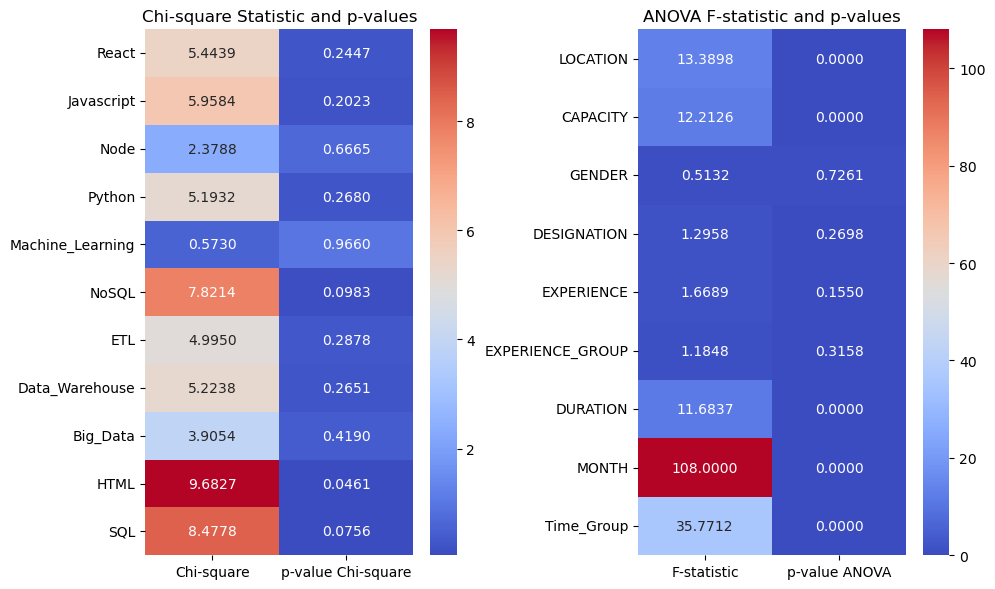

In [405]:
chi2_df = pd.DataFrame(chi2_results).T.rename(columns={0: 'Chi-square', 1: 'p-value Chi-square'})
anova_df = pd.DataFrame(anova_results).T.rename(columns={0: 'F-statistic', 1: 'p-value ANOVA'})

# Create heatmaps
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(chi2_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Chi-square Statistic and p-values')

plt.subplot(1, 2, 2)
sns.heatmap(anova_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('ANOVA F-statistic and p-values')

plt.tight_layout()
plt.show()


Checking all the columns

In [406]:
df1.columns

Index(['NAME', 'DOMAIN', 'LOCATION', 'CAPACITY', 'GENDER', 'DESIGNATION',
       'EXPERIENCE', 'React', 'Javascript', 'Node', 'Python',
       'Machine_Learning', 'NoSQL', 'ETL', 'Data_Warehouse', 'Big_Data',
       'HTML', 'SQL', 'EXPERIENCE_GROUP', 'DURATION', 'MONTH', 'Time_Group'],
      dtype='object')

In [411]:

df1 = df1.drop(columns=['GENDER','DESIGNATION','LOCATION','CAPACITY','EXPERIENCE'])

# MODEL GENERATION

In [412]:
df_model = df1.copy()
X = df_model.drop(columns=['DOMAIN','NAME'])
y = df_model['DOMAIN']

In [413]:
X

,React,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,EXPERIENCE_GROUP,DURATION,MONTH,Time_Group
0,True,True,True,False,False,True,True,False,True,True,True,2,10.0,10,0
1,True,True,False,False,False,True,False,True,True,True,False,3,16.0,7,1
2,False,False,False,False,False,True,True,True,True,False,False,0,19.0,9,1
3,False,False,False,False,False,True,True,True,True,False,False,0,13.0,5,0
4,False,True,True,True,False,False,True,True,True,True,True,0,16.0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,True,True,True,False,False,False,True,False,False,2,15.0,4,0
996,True,False,True,True,False,False,True,False,True,True,False,3,14.0,4,0
997,False,True,True,True,True,False,False,False,False,True,True,1,7.0,12,0
998,True,False,True,False,False,True,False,True,True,True,True,3,15.0,4,0


In [414]:
X.columns

Index(['React', 'Javascript', 'Node', 'Python', 'Machine_Learning', 'NoSQL',
       'ETL', 'Data_Warehouse', 'Big_Data', 'HTML', 'SQL', 'EXPERIENCE_GROUP',
       'DURATION', 'MONTH', 'Time_Group'],
      dtype='object')

In [416]:
y

0      data-engineering
1            full-stack
2          data-science
3        data-analytics
4            full-stack
             ...       
995          full-stack
996            database
997          full-stack
998          full-stack
999        data-science
Name: DOMAIN, Length: 1000, dtype: object

In [419]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [420]:
X_encoded = X.apply(label_encoder.fit_transform)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [422]:
# Define the logistic regression model
lr = LogisticRegression()

# Define the grid search parameters
param_grid_lr = {'C': [0.1, 1, 10]}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search_lr.best_params_)

# Get the best model
best_lr = grid_search_lr.best_estimator_

# Evaluate the best model on the test set
y_pred = best_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Best parameters: {'C': 0.1}
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.00      0.00      0.00        44
data-engineering       0.54      0.30      0.39        43
    data-science       0.17      0.07      0.10        45
        database       0.41      0.62      0.49        71
      full-stack       0.50      0.73      0.59        97

        accuracy                           0.44       300
       macro avg       0.32      0.34      0.31       300
    weighted avg       0.36      0.44      0.38       300



c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [423]:
best_lr = LogisticRegression(C=0.1)

# Train the model
best_lr.fit(X_train, y_train)

# Make predictions
y_pred = best_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.00      0.00      0.00        44
data-engineering       0.54      0.30      0.39        43
    data-science       0.17      0.07      0.10        45
        database       0.41      0.62      0.49        71
      full-stack       0.50      0.73      0.59        97

        accuracy                           0.44       300
       macro avg       0.32      0.34      0.31       300
    weighted avg       0.36      0.44      0.38       300



c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [424]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       1.00      1.00      1.00        44
data-engineering       1.00      1.00      1.00        43
    data-science       1.00      1.00      1.00        45
        database       1.00      1.00      1.00        71
      full-stack       1.00      1.00      1.00        97

        accuracy                           1.00       300
       macro avg       1.00      1.00      1.00       300
    weighted avg       1.00      1.00      1.00       300



In [429]:
from sklearn.ensemble import RandomForestClassifier

# Initialize random forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.81
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.79      0.84      0.81        44
data-engineering       0.75      0.49      0.59        43
    data-science       0.74      0.82      0.78        45
        database       0.78      0.80      0.79        71
      full-stack       0.89      0.94      0.91        97

        accuracy                           0.81       300
       macro avg       0.79      0.78      0.78       300
    weighted avg       0.81      0.81      0.80       300



In [426]:
from sklearn.svm import SVC

# Initialize SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6233333333333333
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.80      0.27      0.41        44
data-engineering       0.55      0.60      0.58        43
    data-science       1.00      0.16      0.27        45
        database       0.50      0.76      0.60        71
      full-stack       0.72      0.91      0.80        97

        accuracy                           0.62       300
       macro avg       0.71      0.54      0.53       300
    weighted avg       0.70      0.62      0.58       300



In [427]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize gradient boosting model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       1.00      1.00      1.00        44
data-engineering       1.00      1.00      1.00        43
    data-science       1.00      1.00      1.00        45
        database       1.00      1.00      1.00        71
      full-stack       1.00      1.00      1.00        97

        accuracy                           1.00       300
       macro avg       1.00      1.00      1.00       300
    weighted avg       1.00      1.00      1.00       300



Hyperparameter Tuning to get the best ml model

In [428]:



# Define hyperparameter grids for each model
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10]}
param_grid_dt = {'max_depth': [3, 5, 7, 9, 11]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7 ]}
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2,0.5]}
param_grid_xgb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2, 0.5]}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": param_grid_lr,
    "Decision Tree": param_grid_dt,
    "Random Forest": param_grid_rf,
    "Gradient Boosting": param_grid_gb,
    "XGBoost": param_grid_xgb
}

# Perform hyperparameter tuning for each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best score for {name}: {best_score}")

    # Evaluate the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------")



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'C': 0.1}
Best score for Logistic Regression: 0.4685714285714285
Accuracy for Logistic Regression: 0.4533333333333333
                  precision    recall  f1-score   support

  data-analytics       0.30      0.07      0.11        44
data-engineering       0.58      0.33      0.42        43
    data-science       0.20      0.07      0.10        45
        database       0.42      0.62      0.50        71
      full-stack       0.49      0.74      0.59        97

        accuracy                           0.45       300
       macro avg       0.40      0.36      0.34       300
    weighted avg       0.42      0.45      0.40       300

--------------------------------------------
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Decision Tree: {'max_depth': 11}
Best score for Decision Tree: 1.0
Accuracy for Decision Tree: 1.0
                  precision    

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\xgboost\sklearn.py", line 1471, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['data-analytics' 'data-engineering' 'data-science' 'database'
 'full-stack']


# Checking the Prediction

In [456]:

import numpy as np

#  the three test arrays
X_test1 = np.array([True, False, False, True, False, True, True, False, True, True, True, 3, 5, 7, 1])
X_test2 = np.array([False, False, False, False, False, False, False, False, False, False, False, 3, 5, 7, 1])
X_test3 = np.array([True, False, False, True, False, True, True, False, True, True, True, 3, 5, 0, 5])

# Reshaping test arrays to 2D arrays with a single row
X_test1_reshaped = X_test1.reshape(1, -1)
X_test2_reshaped = X_test2.reshape(1, -1)
X_test3_reshaped = X_test3.reshape(1, -1)

# Predict using the model
y_pred1 = model.predict(X_test1_reshaped)
y_pred2 = model.predict(X_test2_reshaped)
y_pred3 = model.predict(X_test3_reshaped)

# Print the predictions
print("Predictions for X_test1:", y_pred1)
print("Predictions for X_test2:", y_pred2)
print("Predictions for X_test3:", y_pred3)


Predictions for X_test1: ['database']
Predictions for X_test2: ['full-stack']
Predictions for X_test3: ['data-analytics']


c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
